In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import power_transform
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
%matplotlib inline

Now it's time for another guided example. This time we're going to look at recipes. Specifically we'll use the epicurious dataset, which has a collection of recipes, key terms and ingredients, and their ratings.

What we want to see is if we can use the ingredient and keyword list to predict the rating. For someone writing a cookbook this could be really useful information that could help them choose which recipes to include because they're more likely to be enjoyed and therefore make the book more likely to be successful.

First let's load the dataset. It's [available on Kaggle](https://www.kaggle.com/hugodarwood/epirecipes). We'll use the csv file here and as pull out column names and some summary statistics for ratings.

In [52]:
raw_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/epi_r.csv')

In [4]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

We learn a few things from this analysis. From a ratings perspective, there are just over 20,000 recipes with an average rating of 3.71. What is interesting is that the 25th percentile is actually above the mean. This means there is likely some kind of outlier population. This makes sense when we think about reviews: some bad recipes may have very few very low reviews.

Let's validate the idea a bit further with a histogram.

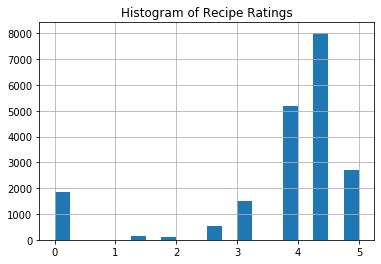

In [5]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

So a few things are shown in this histogram. Firstly there are sharp discontinutities. We don't have continuous data. No recipe has a 3.5 rating, for example. Also we see the anticipated increase at 0.

Let's try a naive approach again, this time using SVM Regressor. But first, we'll have to do a bit of data cleaning.

In [6]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

What we can see right away is that nutrition information is not available for all goods. Now this would be an interesting data point, but let's focus on ingredients and keywords right now. So we'll actually drop the whole columns for calories, protein, fat, and sodium. We'll come back to nutrition information later.

In [72]:
from sklearn.svm import SVR
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1).sample(frac=0.3, replace=True, random_state=1)
Y = raw_data.rating.sample(frac=0.3, replace=True, random_state=1)
svr.fit(X,Y)

C:\Users\M246047\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

__Note that this actually takes quite a while to run, compared to some of the models we've done before. Be patient.__ It's because of the number of features we have.

Let's see what a scatter plot looks like, comparing actuals to predicted.

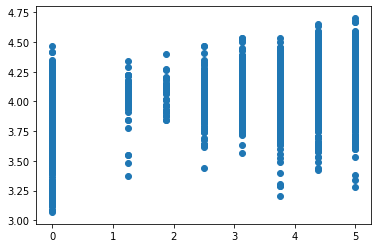

In [8]:
plt.scatter(Y, svr.predict(X))

Now that is a pretty useless visualization. This is because of the discontinuous nature of our outcome variable. There's too much data for us to really see what's going on here. If you wanted to look at it you could create histograms, here we'll move on to the scores of both our full fit model and with cross validation. Again if you choose to run it again it will take some time, so you probably shouldn't.

In [9]:
svr.score(X, Y)

-0.003978314483867651

In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

C:\Users\M246047\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\M246047\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\M246047\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning

array([-0.01787926, -0.02916288, -0.02841122, -0.03767394, -0.01735362])

Oh dear, so this did seem not to work very well. In fact it is remarkably poor. Now there are many things that we could do here. 

Firstly the overfit is a problem, even though it was poor in the first place. We could go back and clean up our feature set. There might be some gains to be made by getting rid of the noise.

We could also see how removing the nulls but including dietary information performs. Though its a slight change to the question we could still possibly get some improvements there.

Lastly, we could take our regression problem and turn it into a classifier. With this number of features and a discontinuous outcome, we might have better luck thinking of this as a classification problem. We could make it simpler still by instead of classifying on each possible value, group reviews to some decided high and low values.

__And that is your challenge.__

Transform this regression problem into a binary classifier and clean up the feature set. You can choose whether or not to include nutritional information, but try to cut your feature set down to the 30 most valuable features.

Good luck!

In [63]:
raw_data.head()

,rating,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,...,pca_1,0.0,1.25,1.875,2.5,3.125,3.75,4.375,5.0,rating_2
16849,5.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.548600,0,0,0,0,0,0,0,1,1
302,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-2.938993,1,0,0,0,0,0,0,0,0
15339,5.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.209019,0,0,0,0,0,0,0,1,1
6516,3.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.524211,0,0,0,0,0,1,0,0,1
1134,4.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.511684,0,0,0,0,0,0,1,0,1


In [53]:
raw_data = raw_data.drop(['title', 'calories', 'protein', 'fat', 'sodium'], 1).sample(frac=0.3, replace=True, random_state=1)
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6016 entries, 235 to 13130
Columns: 675 entries, rating to turkey
dtypes: float64(675)
memory usage: 31.0 MB


In [31]:
raw_data.pineapple.describe()

count    4759.000000
mean        0.012608
std         0.111586
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: pineapple, dtype: float64

While info() indicates that all values are floats, my instinct tells me that the rating column is the only column that should have float values, and everything else should essentially be dummy values as all of the variables I've checked have a max value of one, indicating the cell is one if the variable (text) is contained in the recipe. 

In [54]:
raw_data = raw_data.dropna()
# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
X = StandardScaler().fit_transform(raw_data)

Looking at the correlation matrix wasn't all that useful. There was only one variable (bon appetite) with a correlation greater than 0.1 and three less than -0.2. I'm going to try to print the correlation matrix for all values with high correlations (greater than 0.5 or less than -0.5).

In [33]:
type(raw_data.columns)#.contains('free')

for variable in raw_data.columns:
    if 'free' in variable:
        print(variable)

dairy free
fat free
freeze/chill
freezer food
peanut free
soy free
tree nut free
wheat/gluten-free


I'll create a model using the top twenty-nine correlations for the rating column, and then see if I can create a better model by combining variables into features.

In [55]:
corr_mat = np.abs((raw_data.corr().loc[:, ["rating"]])).sort_values(by='rating', ascending=False)
corr_mat[:29]

,rating
rating,1.000000
drink,0.249141
alcoholic,0.228766
house & garden,0.223845
gin,0.209273
cocktail party,0.154707
spirit,0.146251
bitters,0.143084
cocktail,0.138444
harpercollins,0.135236


I've categorized the rating column into high and low - the new variable has a 1 for a recipe if the rating is above 3.7 (the average) and 0 if below. This model isn't too bad - the SVC score of 0.806 is relatively high and the cross validation scores are within a percent of one another, ranging from 0.8005 to 0.8108 which indicates there's nearly no overfitting.

In [56]:
raw_data['rating_2'] = raw_data['rating'].map(lambda x:1 if x > 3.7 else 0)
svc = SVC()
D = raw_data[['drink', 'alcoholic', 'house & garden', 'gin', 'cocktail party', 'spirit', 'bitters', 'cocktail', 
             'harpercollins', 'bon appétit', 'liqueur', 'rum', 'campari', 'créme de cacao', '3-ingredient recipes',
             'peanut free', 'roast', 'bake', 'condiment', 'roast', 'fall', 'sauté', 'brandy', 'fortified wine',
             'dinner', 'weelicious', 'chartreuse']]
Y = raw_data.rating_2#.sample(frac=0.3, replace=True, random_state=1)
svc.fit(D,Y)

print('SVC Score: ', svc.score(D,Y))

print('\n Cross-Validation Scores: ', cross_val_score(svc, D, Y, cv=10))

C:\Users\M246047\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC Score:  0.801030585106383


C:\Users\M246047\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\M246047\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\M246047\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning


 Cross-Validation Scores:  [0.80762852 0.80099502 0.80232558 0.79568106 0.80033278 0.7953411
 0.80199667 0.79700499 0.79700499 0.80532446]


Here I've created some variables - alcohol, roasting, free, spices, desserts, and fruits to see if we can come up with a more accurate model.

In [57]:
corr_matrix = raw_data.corr()
high_rating = corr_matrix[corr_matrix['rating'] > 0.1]
low_rating = corr_matrix[corr_matrix['rating'] < -0.2]
high_alcoholic = corr_matrix[corr_matrix['alcoholic'] > 0.2]
house_garden = corr_matrix[corr_matrix['house & garden'] > 0.1]
roast = corr_matrix[corr_matrix['roast'] > 0.1]
spices = corr_matrix[corr_matrix['spice'] > 0.05]
vanilla = corr_matrix[corr_matrix['vanilla'] > 0.03]
fruit = corr_matrix[corr_matrix['fruit'] > 0.1]

high_alcoholic.sort_values(by='alcoholic', ascending=False)
raw_data['alcohol'] = (raw_data['alcoholic'] * raw_data['drink'] * raw_data['cocktail party'] * raw_data['cocktail'] * 
raw_data['gin'] * raw_data['spirit'] * raw_data['bitters'] * raw_data['liqueur'] * raw_data['champagne'] * 
raw_data['vodka'] * raw_data['rum'] * raw_data['triple sec'] * raw_data['brandy'] * raw_data['scotch'] *
raw_data['house & garden'])

raw_data['roasting'] = (raw_data['roast'] * raw_data['goose'] * raw_data['pork tenderloin'] * raw_data['poultry'] * 
raw_data['turkey'] * raw_data['rosemary'] * raw_data['rack of lamb'] * raw_data['game'] * raw_data['thanksgiving'] * 
raw_data['dinner'] * raw_data['garlic'] * raw_data['christmas'] * raw_data['parsnip'])

raw_data['free'] =  (raw_data['dairy free'] * raw_data['fat free'] * raw_data['peanut free'] * raw_data['soy free'] * 
raw_data['wheat/gluten-free'] * raw_data['tree nut free'])

raw_data['spices'] = (raw_data['spice'] * raw_data['basil'] * raw_data['chile'] * raw_data['chile pepper'] * 
raw_data['chive'] * raw_data['cilantro'] * raw_data['clove'] * raw_data['coriander'] * raw_data['cumin'] * 
raw_data['curry'] * raw_data['cinnamon'] * raw_data['cardamom'] * raw_data['paprika'] * raw_data['nutmeg'] *
raw_data['saffron'])

raw_data['desserts'] = (raw_data['vanilla'] * raw_data['dessert'] * raw_data['egg'] * raw_data['mixer'] * 
raw_data['frozen dessert'] * raw_data['double boiler'] * raw_data['candy thermometer'] * 
raw_data['phyllo/puff pastry dough'] * raw_data['bake'] * raw_data['cake'])

raw_data['fruits'] = (raw_data['apple'] * raw_data['pear'] * raw_data['berry'] * raw_data['apricot'] * 
raw_data['peach'] * raw_data['mango'] * raw_data['prune'] * raw_data['pineapple'] * 
raw_data['plum'] * raw_data['strawberry'] * raw_data['banana'] * raw_data['cherry'] * raw_data['nectarine'] * 
raw_data['rhubarb'] * raw_data['tropical fruit'] * raw_data['melon'])

high_alcoholic.sort_values(by='alcoholic', ascending=False)
house_garden[['house & garden']].sort_values(by='house & garden', ascending=False)
roast[['roast']].sort_values(by='roast', ascending=False)
spices[['spice']].sort_values(by='spice', ascending=False)
vanilla[['vanilla']].sort_values(by='vanilla', ascending=False)
fruit[['fruit']].sort_values(by='fruit', ascending=False)

,fruit
fruit,1.000000
dessert,0.310166
apple,0.243561
pear,0.212252
berry,0.203929
apricot,0.165906
peach,0.163050
nut,0.158878
mango,0.144715
prune,0.144025


Using the 'roasting', 'alcohol', and 'free' gives us a decent model, but not better than the original - our SVC score is .793 and the cross validation scores are all extremely close, indicating there isn't much overfitting going on. In fact, we have two different numbers for cross validation scores - does this mean the model is incredibly precise, or is there something else going on here?

Adding the 'spices' and 'dessert' features don't change the model at all - the SVC and cross validation scores are exactly the same. While I understand this is possible, I find it hard to believe. Why else would this be?

In [43]:
raw_data['rating_2'] = raw_data['rating'].map(lambda x:1 if x > 3.7 else 0)
svc = SVC()
X = raw_data[['roasting', 'alcohol', 'free']]
Y = raw_data.rating_2#.sample(frac=0.3, replace=True, random_state=1)
svc.fit(X,Y)

print('SVC Score: ', svc.score(X,Y))

cross_val_score(svc, X, Y, cv=5)

C:\Users\M246047\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC Score:  0.7932874526231797


C:\Users\M246047\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\M246047\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\M246047\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning

array([0.79331837, 0.79331837, 0.79326683, 0.79326683, 0.79326683])

In [44]:
svc = SVC()
Z = raw_data[['roasting', 'alcohol', 'free', 'spices', 'dessert']]
Y = raw_data.rating_2#.sample(frac=0.3, replace=True, random_state=1)
svc.fit(Z,Y)

print('SVC Score: ', svc.score(Z,Y))

print('\n Cross-Validation Scores: ', cross_val_score(svc, Z, Y, cv=5))


C:\Users\M246047\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC Score:  0.7932874526231797


C:\Users\M246047\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\M246047\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\M246047\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning


 Cross-Validation Scores:  [0.79331837 0.79331837 0.79326683 0.79326683 0.79326683]


In [45]:
svc = SVC()
D = raw_data[['alcoholic']]
Y = raw_data.rating_2#.sample(frac=0.3, replace=True, random_state=1)
svc.fit(D,Y)

print('SVC Score: ', svc.score(D,Y))

print('\n Cross-Validation Scores: ', cross_val_score(svc, D, Y, cv=5))

C:\Users\M246047\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC Score:  0.7970277279074407


C:\Users\M246047\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\M246047\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\M246047\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning


 Cross-Validation Scores:  [0.7903266  0.79805535 0.79975062 0.79875312 0.79825436]


In [24]:
svc = SVC()
D = raw_data[['desserts']]
Y = raw_data.rating_2#.sample(frac=0.3, replace=True, random_state=1)
svc.fit(D,Y)

print('SVC Score: ', svc.score(D,Y))

print('\n Cross-Validation Scores: ', cross_val_score(svc, D, Y, cv=5))

C:\Users\M246047\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC Score:  0.788563829787234


C:\Users\M246047\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\M246047\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\M246047\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning


 Cross-Validation Scores:  [0.78820598 0.78820598 0.78886118 0.78886118 0.78868552]


In [23]:
svc = SVC()
D = raw_data[['spices']]
Y = raw_data.rating_2#.sample(frac=0.3, replace=True, random_state=1)
svc.fit(D,Y)

print('SVC Score: ', svc.score(D,Y))

print('\n Cross-Validation Scores: ', cross_val_score(svc, D, Y, cv=10))

C:\Users\M246047\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC Score:  0.788563829787234


C:\Users\M246047\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\M246047\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\M246047\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning


 Cross-Validation Scores:  [0.78772803 0.78772803 0.78903654 0.78903654 0.78868552 0.78868552
 0.78868552 0.78868552 0.78868552 0.78868552]


In [50]:
raw_data.head()

,title,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,snack,snack week,turkey,rating_2,alcohol,roasting,free,spices,desserts,fruits
0,"Lentil, Apple, and Turkey Wrap",426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,Boudin Blanc Terrine with Red Onion Confit,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


I'd like to run PCA on this to see if I can get a better model. When I do so, the SVC score is 1, as are all the cross validation scores. Why would this be?

In [69]:
not_rating_df = raw_data.drop(columns = ['rating'])
X = not_rating_df

X = StandardScaler().fit_transform(X)

sklearn_pca = PCA(n_components=20)
not_rating_df['pca_1'] = sklearn_pca.fit_transform(X)
#Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)
#variables = sklearn_pca.explained_variance_ratio

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.01401009 0.01036598 0.00849501 0.00618462 0.00577866 0.00509085
 0.00484427 0.00466782 0.00436998 0.00428398 0.00422368 0.00413124
 0.00405705 0.00397658 0.00394546 0.00384805 0.00372959 0.0037217
 0.00357377 0.00354866]


In [70]:
raw_data['pca_1'] = not_rating_df['pca_1']

In [72]:
raw_data = pd.concat([raw_data, pd.get_dummies(raw_data['rating'])], axis=1)
raw_data[-7:]

,rating,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,...,4.375,5.0,0.0,1.25,1.875,2.5,3.125,3.75,4.375,5.0
8041,4.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,1,0
14486,4.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,1,0
15578,3.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3314,3.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
17437,3.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
6696,5.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
13130,3.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0


In [73]:
#raw_data = raw_data[~raw_data.index.duplicated()]
#raw_dating = raw_data[raw_data['rating'] > 2.5]
raw_data['rating_2'] = raw_data['rating'].map(lambda x:1 if x > 3.7 else 0)

In [74]:
svc = SVC()
Z = raw_data.sample(frac=0.3, replace=True, random_state=1)
Y = raw_data.rating_2.sample(frac=0.3, replace=True, random_state=1)
svc.fit(Z,Y)

C:\Users\M246047\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [75]:
svc.score(Z,Y)

1.0

In [76]:
cross_val_score(svc, Z, Y, cv=5)

C:\Users\M246047\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\M246047\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\M246047\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning

array([1., 1., 1., 1., 1.])